In [1]:
import pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

from sklearn.svm import SVC
from sklearn import svm

In [2]:
#Genere un conjunto de datos compuesto por muchos círculos dispersos en el espacio de dos dimensiones.
#Los puntos dentro de los circulos pertenecen a la categoría "dentro" y los que caen fuera a "fuera"

#Compare con SVM o con RN


#Genero mi espacio
a = -1000
b = 1000
num = 10000

random.seed(5)
x1 = np.random.uniform(a,b,num)
x2 = np.random.uniform(a,b,num)

#Genero mis centros
centros1 = []
for i in range(5):
    c = np.random.uniform(a,b)
    centros1.append(c)

print(centros1)


centros2 = []
for i in range(5):
    c = np.random.uniform(a,b)
    centros2.append(c)

print(centros2)


[-892.3933553552952, 151.34700108639322, 767.8315005543066, -489.67924803695564, -389.08454173257746]
[186.33850229356608, -899.7853309125729, 991.2308021189228, -113.80237286784143, -950.9961148605472]


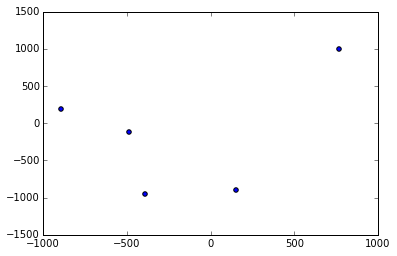

In [3]:
plt.scatter(centros1, centros2, s=20, cmap=plt.cm.cool)
plt.show()

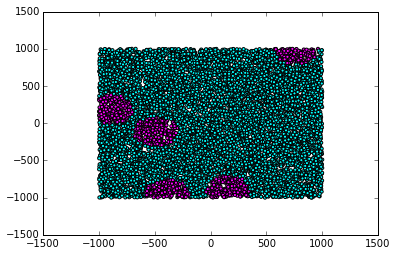

In [4]:
y = []
R = 200

for i in range(len(x1)):
    y1=0
    for j in range(len(centros1)):
        if ((((x1[i]-centros1[j])**2)+((x2[i]-centros2[j])**2)) < R**2):
            y1 = 1       
    y.append(y1)
    

XY = []
for k in range (len(x1)):
    XY.append([x1[k],x2[k],y[k]])
    
XY = pd.DataFrame(XY,columns=['x1','x2','y'])

#print(XY)

plt.scatter(XY['x1'], XY['x2'], s=10, c=XY['y'], cmap=plt.cm.cool)
plt.show()

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XY[['x1','x2']], XY[['y']], train_size=0.75)

#Máquinas de Soporte Vectorial / Curva ROC / Matriz de Confusión

In [6]:
from sklearn.svm import SVC
from sklearn import svm

mod = svm.SVC(kernel='rbf',gamma=1)

In [7]:
mod.fit(XY[['x1','x2']],XY['y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=1,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
res1 = mod.decision_function(zip(X_test.iloc[:,0],X_test.iloc[:,1]))
res1

array([-0.99971565, -0.99979   , -0.99946987, ...,  0.19239022,
       -1.00037325, -0.99954269])

In [9]:
umbral = 0

y_predict = []

for i in range(len(res1)):
    if res1[i] > umbral:
        y_predict.append(1)
    else:
        y_predict.append(0)
         
#y_predict

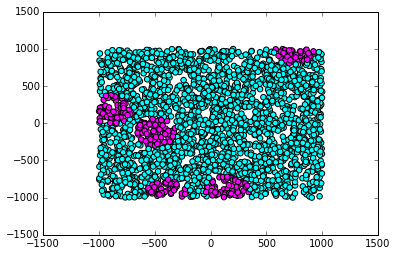

In [10]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=30, c=y_predict, cmap=plt.cm.cool)

In [11]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,umbrales = roc_curve(Y_test.iloc[:,0],res1)
#print(fpr)
#print(tpr)
#print(umbrales)
print(auc(fpr,tpr))

1.0


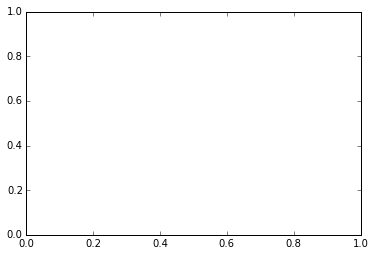

In [12]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
plt.plot(fpr,tpr)
#for x in range(0,len(Y_test.iloc[:,0]),100):
#    a = round(umbrales[x],2)
#    b = [fpr[x],tpr[x]]
#    pltreal.annotate('(%s)' % a,xy=b,size='small')  
#plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1])

array([[2189,    0],
       [   0,  311]])

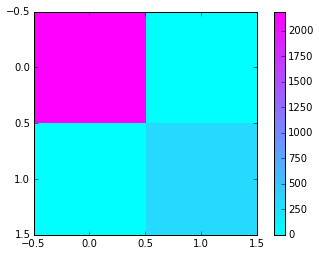

In [14]:
plt.imshow(confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1]),interpolation='nearest',cmap=plt.cm.cool)
plt.colorbar()
plt.show()

#K neighbors / Curva ROC / Matriz de Confusión

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
Y_train = np.ravel(Y_train)
neigh.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [16]:
res2 = neigh.predict(X_test)
res2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
umbral = 0

y_predict2 = []

for i in range(len(res2)):
    if res2[i] > umbral:
        y_predict2.append(1)
    else:
        y_predict2.append(0)
         
#y_predict2

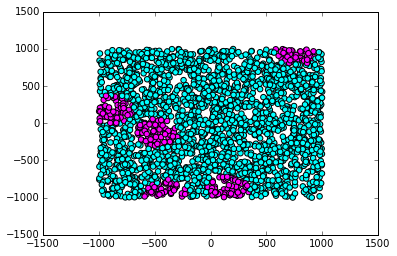

In [18]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=30, c=y_predict2, cmap=plt.cm.cool)

In [19]:
fpr,tpr,umbrales = roc_curve(Y_test.iloc[:,0],res2)
#print(fpr)
#print(tpr)
#print(umbrales)
print(auc(fpr,tpr))

0.983931643015


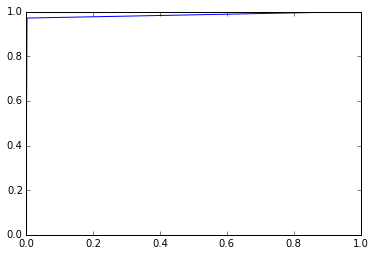

In [20]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
plt.plot(fpr,tpr)
#for x in range(0,len(Y_test.iloc[:,0]),1):
#    a = round(umbrales[x],2)
#    b = [fpr[x],tpr[x]]
#    pltreal.annotate('(%s)' % a,xy=b,size='small')  
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test.iloc[:,0],y_predict2,labels=[0,1])

array([[2182,    7],
       [   9,  302]])

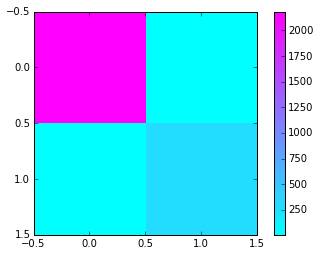

In [22]:
plt.imshow(confusion_matrix(Y_test.iloc[:,0],y_predict2,labels=[0,1]),interpolation='nearest',cmap=plt.cm.cool)
plt.colorbar()
plt.show()